# Outil de validation

+ Train Test Split
+ Cross Validation
+ Validation curve
+ GridSearch CV
+ Confusion Matrix
+ Learning Curve

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import load_iris

In [19]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
iris = load_iris()

features = iris.data
target = iris.target



### Plot datas

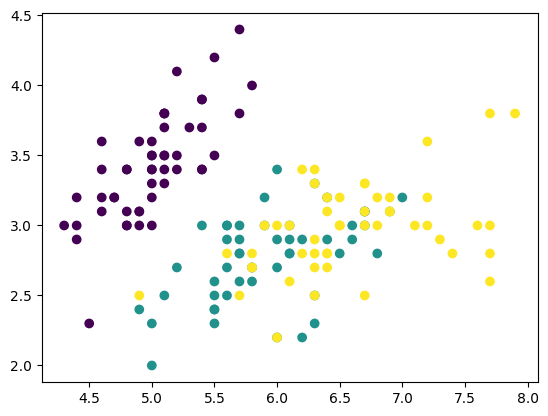

In [21]:
plt.scatter(features[:, 0], features[:, 1], c=target)

### Train Test split

In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest= train_test_split(features, target, test_size= .2)

In [23]:
print(f'Shape of train set : {Xtrain.shape}')
print(f'Shape of Test set : {Xtest.shape}')

Shape of train set : (120, 4)
Shape of Test set : (30, 4)


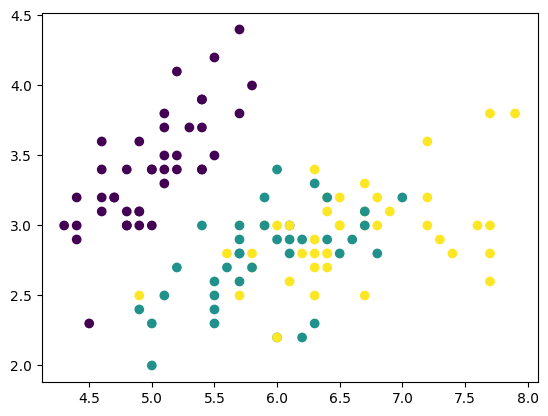

In [24]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain)

### Model KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)

model_KNN.fit(Xtrain,ytrain)

KNeighborsClassifier()

### Scoring of model

In [26]:
display(f"score for train Set : {model_KNN.score(Xtrain, ytrain)}")
f"score for test Set : {model_KNN.score(Xtest, ytest)}"

'score for train Set : 0.9833333333333333'

'score for test Set : 0.9333333333333333'

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=5),
                Xtrain, ytrain, cv=5, scoring='accuracy')

array([1.        , 0.95833333, 0.95833333, 0.91666667, 1.        ])

In [28]:
cross_val_score(KNeighborsClassifier(n_neighbors=5),
                Xtrain, ytrain, cv=5, scoring='accuracy').mean()

0.9666666666666668

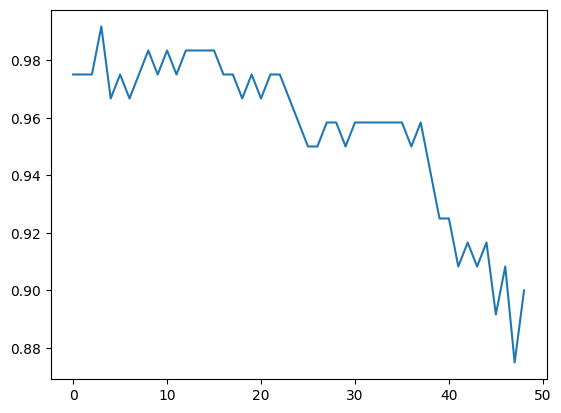

In [29]:
val_score = []
for n_neighbors in range(1, 50):
	score = cross_val_score(KNeighborsClassifier(
		n_neighbors), Xtrain, ytrain, cv=5, scoring='accuracy').mean()
	val_score.append(score)

plt.plot(val_score)

<module 'matplotlib.pyplot' from 'c:\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

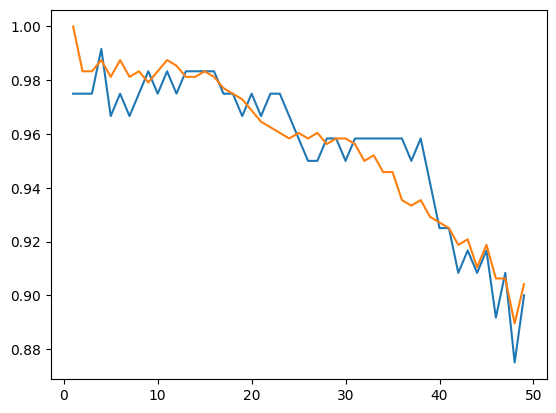

In [30]:
import numpy as np

from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(
    estimator=model, X=Xtrain, y=ytrain, param_name='n_neighbors', param_range=k, cv=5)

val_score.mean(axis=1)  # Moyenne des 50 valeurs trouvees.

# courbe de validation
plt.plot(k, val_score.mean(axis=1), label='validation curve')
# courbe d'apprentissage
plt.plot(k, train_score.mean(axis=1), label='train curve')
plt